In [190]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [191]:
plt.rcParams.update({'font.size': 15})

In [192]:
neural_net_names = [
    ('cnn_1_untrained', 'CNN-1'),
    ('vgg_m_untrained', 'Untrained VGG-M'),
    ('vgg_m_finetuned', 'Finetuned VGG-M'),
    ('vgg_m_pretrained', 'Pretrained VGG-M')]
best_neural_net_perf = dict()

for (nn_name, pretty_nn) in neural_net_names:
    with open('{}_history.pkl'.format(nn_name), 'rb') as f:
        histories = pickle.load(f)
    best_neural_net_perf[pretty_nn] = dict()
    for hist in histories:
        best_neural_net_perf[pretty_nn][hist['label']] = max(hist['test_accs'])

In [193]:
best_dr_svm_perf = pd.read_excel(
    'dr_svm_best_accuracies.xlsx',
    sheet_name=['eye', 'head', 'facial position'])

In [194]:
best_class_perf = dict()

In [195]:
best_class_perf['eye_state'] = best_dr_svm_perf['eye'][[
    'method', 'accuracy']].to_dict(orient='list')
for nn in best_neural_net_perf:
    best_class_perf[
        'eye_state']['method'].append(nn)
    best_class_perf[
        'eye_state']['accuracy'].append(best_neural_net_perf[nn]['eye_state'])

In [196]:
best_class_perf['head_position'] = best_dr_svm_perf['head'][[
    'method', 'accuracy']].to_dict(orient='list')
for nn in best_neural_net_perf:
    best_class_perf[
        'head_position']['method'].append(nn)
    best_class_perf[
        'head_position']['accuracy'].append(best_neural_net_perf[nn]['head_position'])

In [197]:
best_class_perf['facial_expression'] = best_dr_svm_perf['facial position'][[
    'method', 'accuracy']].to_dict(orient='list')
for nn in best_neural_net_perf:
    best_class_perf[
        'facial_expression']['method'].append(nn)
    best_class_perf[
        'facial_expression']['accuracy'].append(best_neural_net_perf[nn]['facial_expression'])

In [199]:
def get_color(method):
    if '-' in method:
        return 'tab:blue'
    return 'tab:orange'

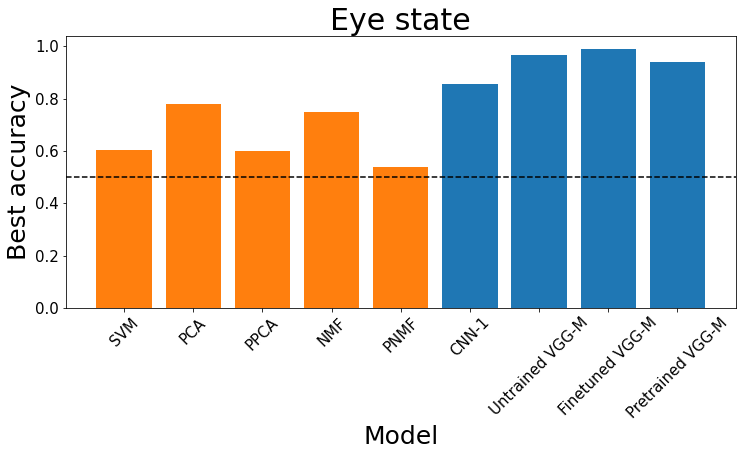

In [202]:
clz = 'eye_state'
plt.figure(figsize=(12,5))
plt.bar(
    best_class_perf[clz]['method'],
    best_class_perf[clz]['accuracy'],
    color=[get_color(m) for m in best_class_perf[clz]['method']])
plt.axhline(0.5, linestyle='--', color='black')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Model', fontsize=25)
plt.ylabel('Best accuracy', fontsize=25)
plt.title('Eye state', fontsize=30)
plt.show()

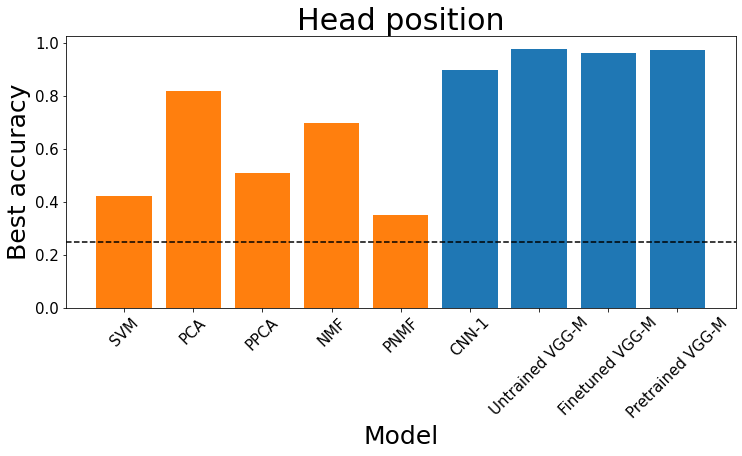

In [201]:
clz = 'head_position'
plt.figure(figsize=(12,5))
plt.bar(
    best_class_perf[clz]['method'],
    best_class_perf[clz]['accuracy'],
    color=[get_color(m) for m in best_class_perf[clz]['method']])
plt.axhline(0.25, linestyle='--', color='black')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Model', fontsize=25)
plt.ylabel('Best accuracy', fontsize=25)
plt.title('Head position', fontsize=30)
plt.show()

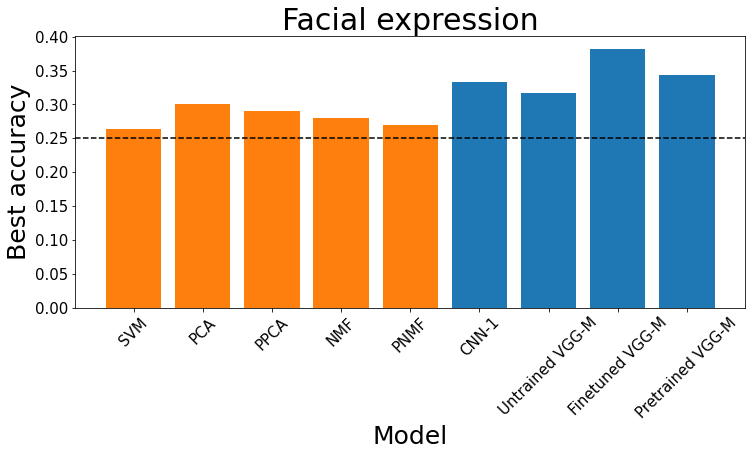

In [203]:
clz = 'facial_expression'
plt.figure(figsize=(12,5))
plt.bar(
    best_class_perf[clz]['method'],
    best_class_perf[clz]['accuracy'],
    color=[get_color(m) for m in best_class_perf[clz]['method']])
plt.axhline(0.25, linestyle='--', color='black')
plt.xticks(rotation = 45, rotation_mode='default')
plt.xlabel('Model', fontsize=25)
plt.ylabel('Best accuracy', fontsize=25)
plt.title('Facial expression', fontsize=30)
plt.show()